# Machine Learning Project 1:
# Tunisair Flight Delay Prediction Challenge

<br>

---

## Data Code Book

#### Dataset
|Variable|Code|
|--------|----|
|`DATOP` | Date of flight|
|`FLTID` | Flight number|
|`DEPSTN` | Departure point|
|`ARRSTN` | Arrival point|
|`STD` | Scheduled Time departure|
|`STA` | Scheduled Time arrival|
|`STATUS` | Flight status|
|`AC` | Aircraft Code|

#### Flight Status Codes
|Variable|Code|
|--------|----|
|`ATD` | Actual Time of Departure|
|`ATA` | Actual Time of Arrival|
|`ETD` | Expected Time Departure|
|`ETA` | Expected Time Arrival|
|`RTR` | Ready to Run (?)/ Return to Ramp(?)|
|`DEL` | Deleted (?)/ Delayed (?) |

#### Code Interoperability

|My Object Name|Main Script Object Name|
|--------------|-----------------------|
|`train_df`|`flights`|
|column `FLT_TYPE`| `flt_type`|

<br>

---

## Environment Set Up

In [143]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import math
import re
import datetime

from matplotlib import rcParams

# Set random seed
RSEED = 50

In [ ]:
# Import data
train_data_raw = pd.read_csv('./data/train.csv')
test_data_raw = pd.read_csv('./data/test.csv')
submission_sample = pd.read_csv('./data/SampleSubmission.csv')

<br>
 
 ---

## Exploratory Data Analysis
> **Note:** Compute Descriptive Stats!!

### Data Inspection

In [97]:
print('Dimensions of training dataset:', train_data_raw.shape)
print('Dimensions of test dataset:    ', test_data_raw.shape)

Dimensions of training dataset: (107833, 10)
Dimensions of test dataset:     (9333, 9)


In [98]:
train_data_raw

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0


In [99]:
test_data_raw

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ
...,...,...,...,...,...,...,...,...,...
9328,test_id_9328,2018-09-12,TU 0998,TUN,NCE,2018-09-12 14:15:00,2018-09-12 15.45.00,ATA,TU 320IMV
9329,test_id_9329,2018-09-27,WKL 0000,TUN,TUN,2018-09-27 22:00:00,2018-09-28 01.00.00,SCH,TU 32AIMG
9330,test_id_9330,2018-09-03,UG 1601,SJJ,TUN,2018-09-03 09:20:00,2018-09-03 11.10.00,SCH,TU CR9ISA
9331,test_id_9331,2018-09-15,UG 0008,TUN,DJE,2018-09-15 14:30:00,2018-09-15 15.30.00,SCH,UG AT7LBD


As can be seen in the output below, there are no missing values in the dataset
but some of the column formats are wrong.

In [100]:
train_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


### Fixing Column Formats

In [101]:
# Copy raw data to new data frame
train_df = train_data_raw.copy()

# Replace '.' time element seperator in column STA with ':'
train_df['STA'] = train_df['STA'].str.replace('.', ':')

# Fix format of date columns
train_df['DATOP'] = pd.to_datetime(train_df['DATOP'])
train_df['STD'] = pd.to_datetime(train_df['STD'])
train_df['STA'] = pd.to_datetime(train_df['STA'])

# Fix format of categorical columns
train_df['ID'] = train_df['ID'].astype('category')
train_df['FLTID'] = train_df['FLTID'].astype('category')
train_df['DEPSTN'] = train_df['DEPSTN'].astype('category')
train_df['ARRSTN'] = train_df['ARRSTN'].astype('category')
train_df['STATUS'] = train_df['STATUS'].astype('category')
train_df['AC'] = train_df['AC'].astype('category')

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ID      107833 non-null  category      
 1   DATOP   107833 non-null  datetime64[ns]
 2   FLTID   107833 non-null  category      
 3   DEPSTN  107833 non-null  category      
 4   ARRSTN  107833 non-null  category      
 5   STD     107833 non-null  datetime64[ns]
 6   STA     107833 non-null  datetime64[ns]
 7   STATUS  107833 non-null  category      
 8   AC      107833 non-null  category      
 9   target  107833 non-null  float64       
dtypes: category(6), datetime64[ns](3), float64(1)
memory usage: 9.5 MB


### Parsing Flight ID Column
> **Note:** There are some airline codes that start with a number or only one letter!

In [102]:
# Save unique Flight IDs to CSV-file
# pd.DataFrame(train_df['FLTID'].unique().tolist()).to_csv('./data/Unique_FLTIDs.csv')

# Use regular expressions to extract string components from FLTID column
# Note: Requires `import re` to work
train_df['AIRLINE'] = train_df['FLTID'].str.extract(r'([A-Z]{2,3})')
train_df['FLT_TYPE'] = train_df['FLTID'].str.extract(r'([0-9]{4})')

# Recode FLT_TYPE from number to string descriptor using regular expressions
flt_type_conditions = [
    train_df['FLT_TYPE'].str.match(r'(^00[0-9]{2})$'),           # Match 0001-0099 'premium/ long haul'
    train_df['FLT_TYPE'].str.match(r'(^0[1-9][0-9]{2}$)'),       # Match 0100-0999 'intercontinental'
    train_df['FLT_TYPE'].str.match(r'(^1[0-2][0-9][0-9])'),      # Match 1000-1299 'domestic/ short haul'
    train_df['FLT_TYPE'].str.match(r'(^[3-5][0-9][0-9][0-9])'),  # Match 3000-5999 'regional/ subsidiary'
    train_df['FLT_TYPE'].str.match(r'(^[6-7][0-9][0-9][0-9])'),  # Match 6000-7999 'codeshare' (subsidiary)
    train_df['FLT_TYPE'].str.contains('8000'),                   # Match 8000 'charter'
    train_df['FLT_TYPE'].str.contains('9000'),                   # Match 9000 'positioning flight'
    train_df['FLT_TYPE'].str.contains('0000')                    # Match 0000 'non-commercial'
]

# Define string labels for flight type codes
flt_type_labels = ['premium/ long haul', 'intercontinental', 'domestic/ short haul',
                   'regional/ subsidiary', 'codeshare', 'charter', 'positioning flight',
                   'non-commercial flights']

# Replace numeric codes with string codes
train_df['FLT_TYPE'] = np.select(flt_type_conditions, flt_type_labels, default='unknown')
train_df['FLT_TYPE'] = train_df['FLT_TYPE'].astype('category')
train_df.head()

# RegEx Playground for testing expressions
# train_df[train_df['FLT_TYPE'].str.match(
#     r'(^90{3})'                                                # Regular expression inside r'()'
#     )].sort_values(by='FLT_TYPE').FLT_TYPE.unique()            # Sort unique FLT_TYPE values

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,AIRLINE,FLT_TYPE
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,TU,intercontinental
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,TU,intercontinental
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,TU,intercontinental
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,TU,intercontinental
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,TU,intercontinental


In [103]:
# RegEx Playground for testing expressions
train_df[train_df['FLT_TYPE'].str.match(
    r'(^90{3})'                                                # Regular expression inside r'()'
    )].sort_values(by='FLT_TYPE').FLT_TYPE.unique()            # Sort unique FLT_TYPE values

[], Categories (7, object): ['codeshare', 'domestic/ short haul', 'intercontinental', 'positioning flight', 'premium/ long haul', 'regional/ subsidiary', 'unknown']

### Data Visualisation

#### Delay Over Time

Text(0, 0.5, 'Delay in Minutes')

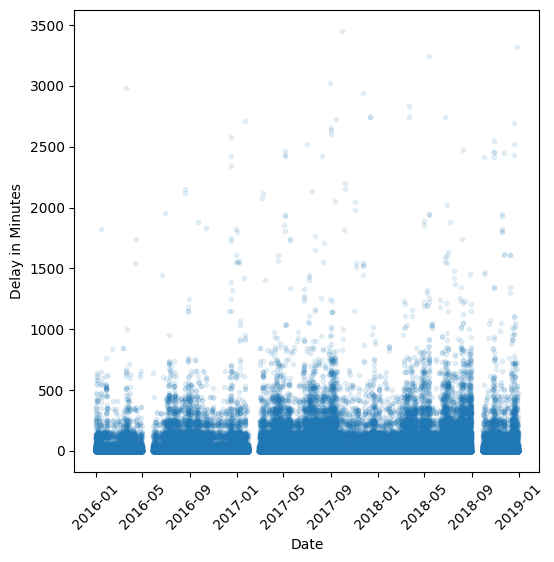

In [104]:
plt.scatter(x=train_df.DATOP, y=train_df.target, alpha=0.1, marker='.')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Delay in Minutes')

AttributeError: 'Series' object has no attribute 'st'

/Users/Yannek_1/Documents/03_Data Science & AI/ds-ml-flight-delays-project/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


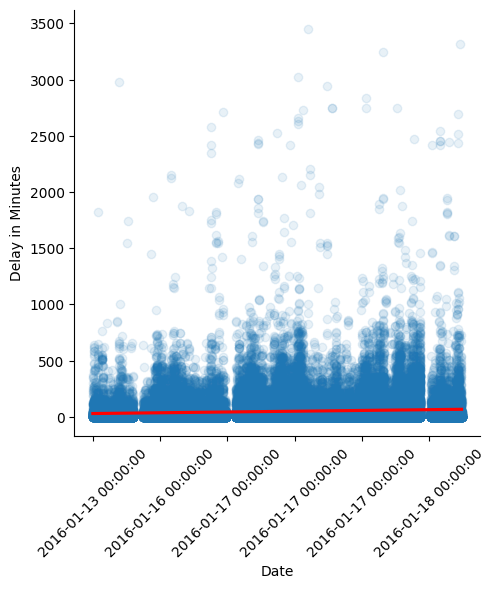

In [ ]:
# Set plot parameters

# Make date ordinal and integer so that it can be plotted by Seaborn
train_df['ORD_DATE'] = pd.to_datetime(train_df['DATOP'])
train_df['ORD_DATE'] = mdates.date2num(train_df['DATOP'])
train_df['ORD_DATE'] = train_df.ORD_DATE.astype(dtype='int')
# .apply(lambda date: date.toordinal())

ax = sns.lmplot(data=train_df, x='ORD_DATE', y='target',
                line_kws={'color': 'red'},
                scatter_kws={'alpha': 0.1,
                             'marker': ''})

#plt.scatter(x=train_df.ORD_DATE, y=train_df.target, alpha=0.1, marker='.')
# sns.lmplot(x='ORD_DATE', y='target', data=train_df)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Delay in Minutes')

# Convert ordinal date on x-axis back to datetime format
x_dates = pd.to_datetime(train_df['ORD_DATE'], unit='D')
ax.set(xticklabels=x_dates)

# date_labels = [date.fromordinal(
#     train_df.ORD_DATE
#     ) for item in ax.axes[0,0].get_xticks()]
# ax.set(xlim=(train_df['']))
# date_labels = [date.fromordinal(int(item)) for item in train_df['ORD_DATE']]

In [ ]:
date.fromordinal([hex(item) for item in train_df['ORD_DATE']])

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
train_df['ORD_DATE'].unique()

array([735966, 735976, 735979, ..., 737056, 737057, 737058])

#### Delay by Point of Arrival

<Axes: xlabel='target', ylabel='ARRSTN'>

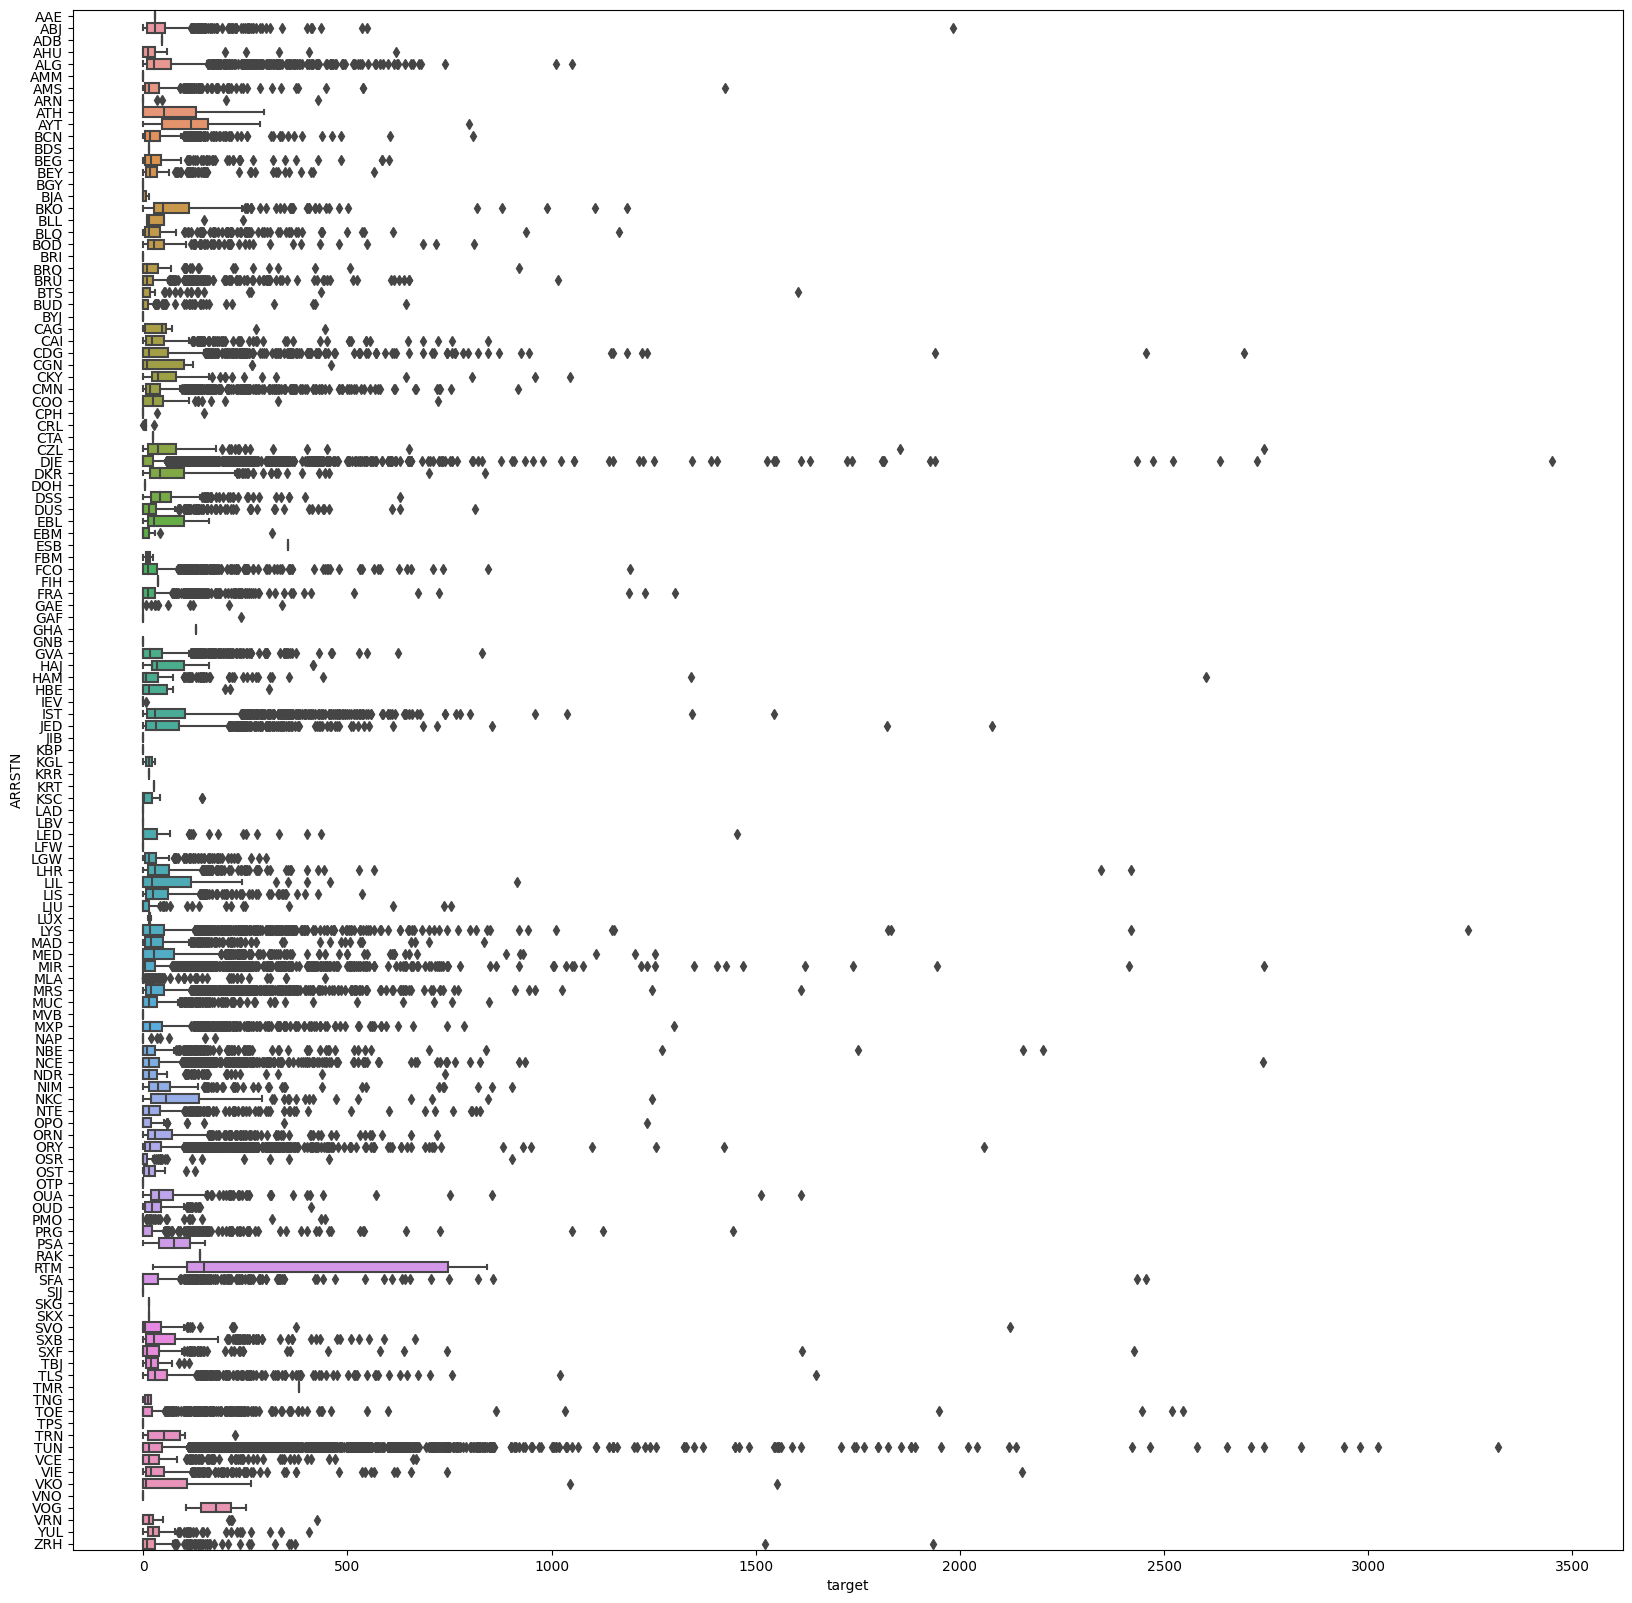

In [ ]:
rcParams['figure.figsize'] = 20, 20
sns.boxplot(data=train_df, x='target', y='ARRSTN')

#### Delay by Point of Departure

<Axes: xlabel='target', ylabel='DEPSTN'>

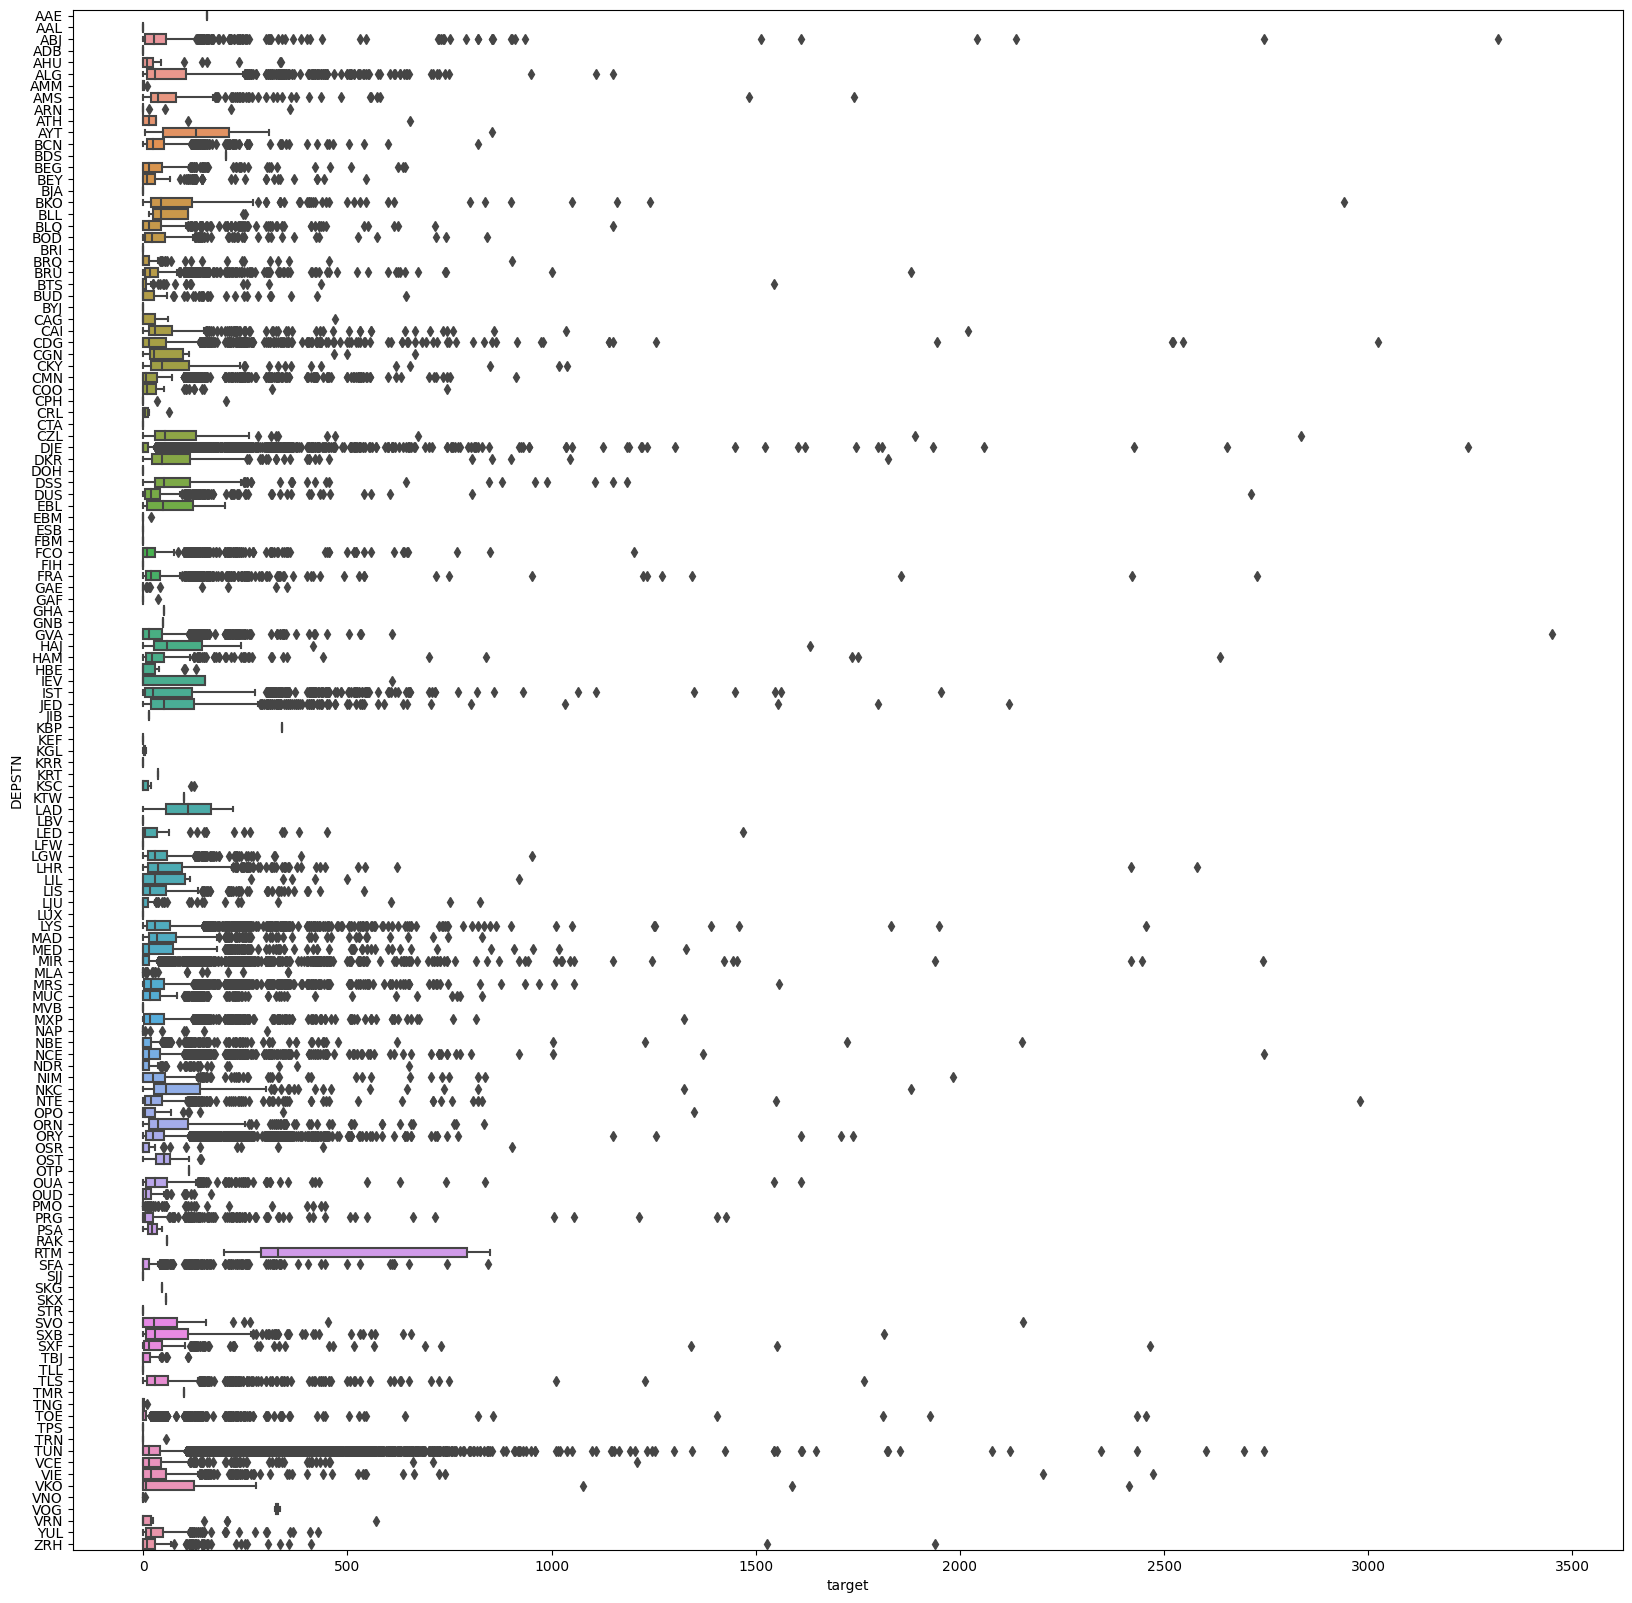

In [ ]:
rcParams['figure.figsize'] = 20, 20
sns.boxplot(data=train_df, x='target', y='DEPSTN')

#### Delay by Flight Status

<Axes: xlabel='STATUS', ylabel='target'>

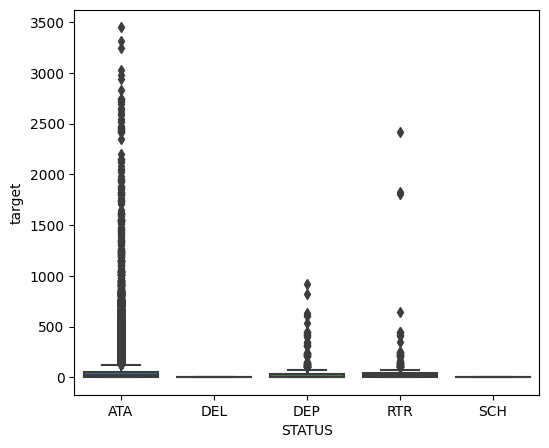

In [ ]:
rcParams['figure.figsize'] = 6, 5
sns.boxplot(data=train_df, x='STATUS', y='target')

#### Delay by Airline

<Axes: xlabel='AIRLINE', ylabel='target'>

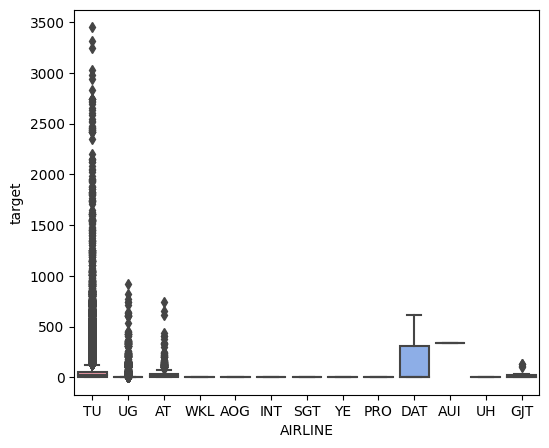

In [ ]:
sns.boxplot(data=train_df, x='AIRLINE', y='target')

#### Delay by Flight Type

<Axes: xlabel='target', ylabel='FLT_TYPE'>

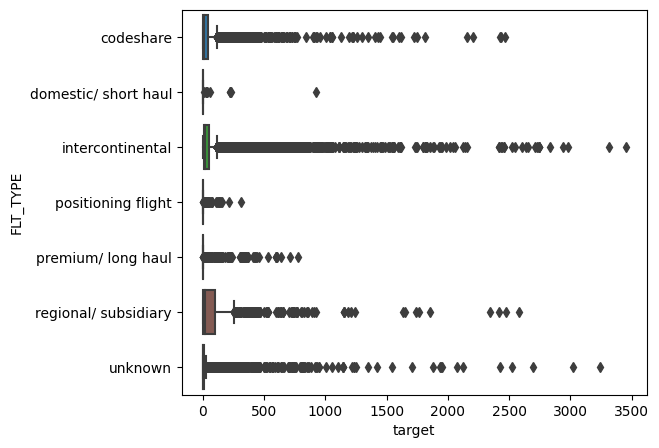

In [ ]:
sns.boxplot(data=train_df, x='target', y='FLT_TYPE')

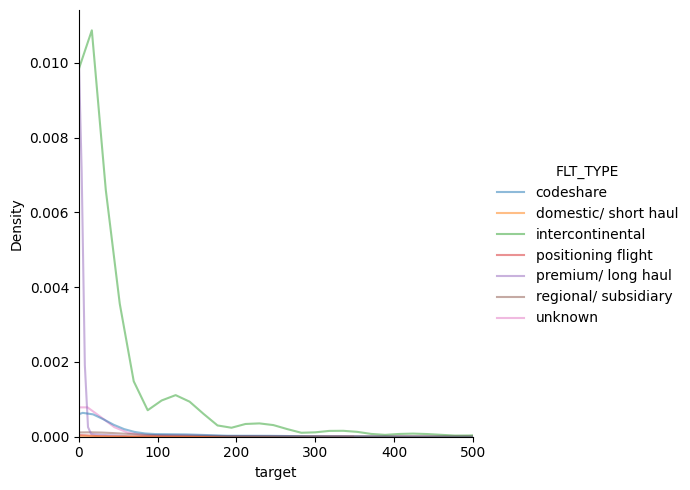

In [ ]:
ax = sns.displot(data=train_df, x='target', hue='FLT_TYPE', alpha=0.5, kind='kde')
ax.set(xlim=(0, 500))

---

## Modelling